# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [1]:
import pandas as pd

file_path = 'train.csv'
df = pd.read_csv(file_path)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [2]:
def num_nans(df):
    nan_rows = df[df.isna().any(axis=1)]
    return len(nan_rows.index)
print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [3]:
def drop_na(df):
    return df.dropna(axis=1, thresh=len(df.index)-200)

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [4]:
def to_numerical(df):
    return df["Sex"].replace(["male", "female"], [0, 1])

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
def extract_names(df):
    temp = df.copy(deep=True)
    temp[['Last Name', 'Other']] = temp["Name"].str.split(",", expand=True)
    temp[['Title', 'Other']] = temp["Other"].str.split(". ", n=1, expand=True)
    temp[['Main', 'Other']] = temp["Other"].str.split(" \(", n=1, expand=True)
    temp[['First Name', 'Middle Name']] = temp["Main"].str.split(" ", n=1, expand=True)
    temp.fillna(value=pd.np.nan, inplace=True)
    return temp[['First Name', 'Middle Name', 'Last Name', 'Title']]


df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

/var/folders/4r/42gt78zx6dl79z2kbnw5gvfc0000gn/T/ipykernel_67409/2209454676.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  temp.fillna(value=pd.np.nan, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [6]:
def replace_with_mean(df):
    print(df["Age"].mean())
    return df['Age'].fillna(df["Age"].mean())

df['Age'] = replace_with_mean(df)
df.head()

29.69911764705882


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

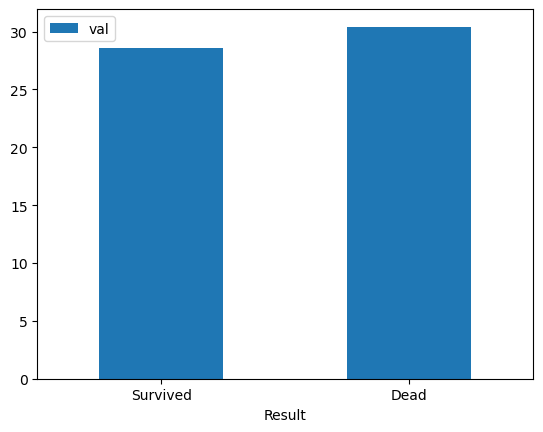

In [7]:
temp_1 = df.loc[df['Survived'] == 0]["Age"].mean()
temp_2 = df.loc[df['Survived'] == 1]["Age"].mean()
tempDF = pd.DataFrame({'Result':['Survived', 'Dead'], 'val':[temp_2, temp_1]})
ax = tempDF.plot.bar(x='Result', y='val', rot=0)

The average age that survived is lower than the average age that did not survive, but overall, there is not a huge difference in average ages that survived and did not survive.

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

<AxesSubplot: xlabel='Sex'>

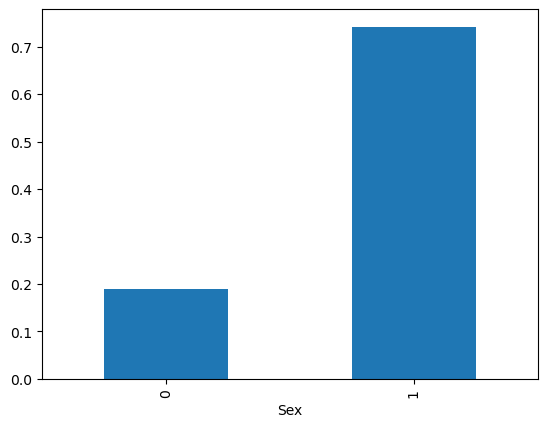

In [8]:
df.groupby('Sex').Survived.mean().plot.bar()

I observed that female survived rate is significantly higher than male. 

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

<AxesSubplot: xlabel='Title'>

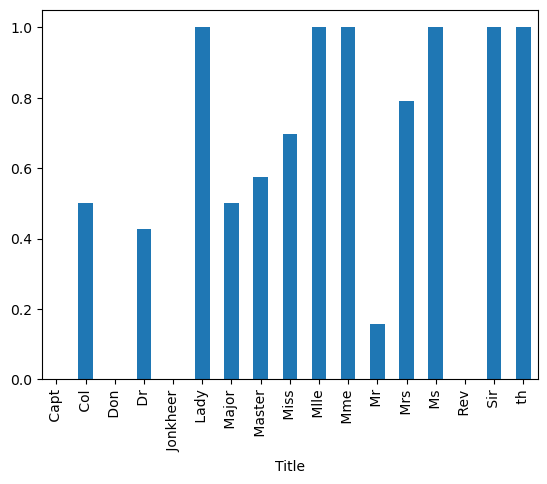

In [9]:
df.groupby('Title').Survived.mean().plot.bar()

I found that female titles and titles that implies high priviledges survived the most.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot: xlabel='Survived'>

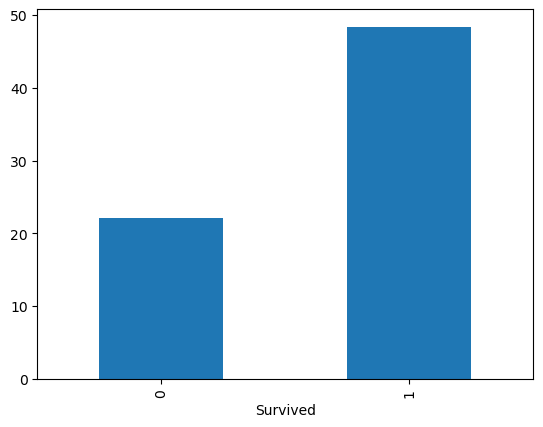

In [10]:
df.groupby("Survived").Fare.mean().plot.bar()


People that survived paid around twice of the Fare on average as the people who did not survive.

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot: title={'center': 'Fare'}, xlabel='Survived'>

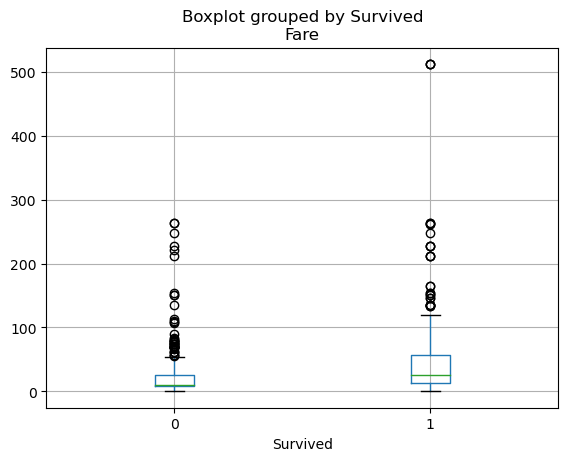

In [11]:
df.boxplot(column="Fare", by="Survived")

We can see that in general, most of the surviors paid higher fare than most of people who died. But there are some exceptions, there are also some people that paid high fare but still died.

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [12]:
def fare_distribution(df):
    temp = df["Fare"] - df["Fare"].mean()
    temp = temp.div(df["Fare"].std())
    return temp

df["Fare"] = fare_distribution(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [13]:
df_name = df
df = df.select_dtypes(['number'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,-0.502163
1,2,1,1,1,38.0,1,0,0.786404
2,3,1,3,1,26.0,0,0,-0.488580
3,4,1,1,1,35.0,1,0,0.420494
4,5,0,3,0,35.0,0,0,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar **pairs** of passengers using the euclidean distance and ignoring pairs that have distance zero - (15 points)

In [14]:
import numpy as np
from cmath import sqrt

def N_most_similar_pairs(df, N):
    temp = df.drop('PassengerId', axis=1)
    N = 5
    arr_distance = [100000000 for i in range(N)]
    arr_pair = [["_" for i in range(2)] for j in range(N)]
    for index1, row1 in temp.iterrows():
        for index2, row2 in temp.iterrows():
            if index1 >= index2:
                continue
            # calculate distance
            dist = sqrt((row1['Survived'] - row2['Survived'])**2 + (row1['Pclass'] - row2['Pclass'])**2 
        + (row1['Age'] - row2['Age'])**2 + (row1['SibSp'] - row2['SibSp'])**2 
        + (row1['Parch'] - row2['Parch'])**2 + (row1['Fare'] - row2['Fare'])**2)
            dist = dist.real
            # dist = np.linalg.norm(row1 - row2)
            for i in range(N):
                if dist <= arr_distance[i]:
                    arr_distance[i] = dist
                    arr_pair[i][0] = df_name.iloc[index1]["Name"]
                    arr_pair[i][1] = df_name.iloc[index2]["Name"]
                    break
            
    return arr_pair



print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

The 3 most similar pairs of passengers are: [['Sage, Mr. Douglas Bullen', 'Sage, Miss. Dorothy Edith "Dolly"'], ['Zabour, Miss. Thamine', 'Caram, Mrs. Joseph (Maria Elias)'], ['Sadlier, Mr. Matthew', "O'Connell, Mr. Patrick D"], ['Elias, Mr. Dibo', 'Razi, Mr. Raihed'], ['Mullens, Miss. Katherine "Katie"', 'Mannion, Miss. Margareth']]


## Exercise 2 (40 points)

This exercise will be using the [mnist dataset](http://yann.lecun.com/exdb/mnist/) and challenge your understanding of clustering and kmeans.

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. Hint: the centroid of the cluster has the same dimensions as the images in the dataset. - (10 points)

print(centroids.shape): (10, 64)
print(centroids.shape) after reshape: (10, 8, 8)


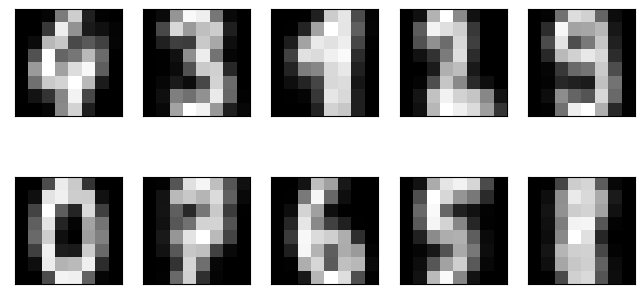

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

mnist = load_digits()

# normalize the pixel values, let all values constrainted in [0, 1]
X = mnist.data / 16.0

# plt.gray()
# plt.matshow(mnist.images[0])
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10) # with 10 centroids initialy
kmeans.fit(X)

# get centroids and reshape it to have same dimensions as the images in dataset
centroids = kmeans.cluster_centers_
print("print(centroids.shape):", centroids.shape)
centroids = centroids.reshape(-1, 8, 8)
print("print(centroids.shape) after reshape:", centroids.shape)

# plot
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(8, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(centroids[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
plt.show()

b) Each of the images has a label corresponding to the digit that the image represents. These labels generate a clustering of the images where all images of digit 1 for example are in cluster labeled `1`. Compare the [silhouette scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the clustering you created above to those of the clustering generated from the labels attached to each image. Explain - (10 points)

In [16]:
from sklearn.metrics import silhouette_score

kmeans_silscore = silhouette_score(X, kmeans.labels_)


origin_silscore = silhouette_score(X, mnist.target)

print("kmeans_silscore: ", kmeans_silscore)
print("origin_silscore: ", origin_silscore)

kmeans_silscore:  0.18249069204151275
origin_silscore:  0.1629432052257522


In general, a higher silhouette score indicates a better clustering, where the values range from -1 to 1, with 1 being the best possible value.

These two scores are similar to each other, which indicating that our Kmeans clustering got a good approximation of the label-based clustering.

A higher silhouette score for the Kmeans clustering indicates that the Kmeans algorithm has created more compact and well-separated clusters, but it doesn't always mean that it has a better accuracy.

c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (5 points)

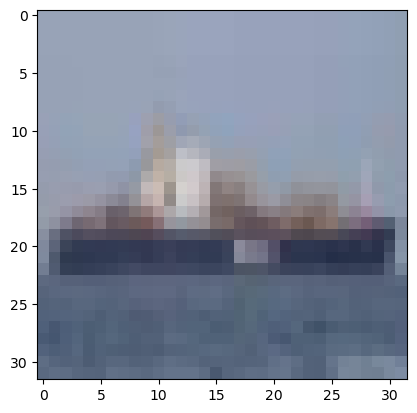

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy.random as rd
import numpy as np
from sklearn.cluster import KMeans

file = 'data_batch_1'

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

whole = unpickle(file)
ran = rd.randint(0,8196)
selected = whole.get(b'data')[ran]
selected = selected.reshape(3,32,32)
for i in range(3):
    selected[i] = selected[i].T
    
selected = selected.swapaxes(2,0)
label = whole.get(b'filenames')
plt.imshow(selected)

d) This image is 32 x 32 = 1024 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. So, in a way, we have a dataset of 1024 3-dimensional data points. By applying Kmeans to this dataset, we are clustering for similar colors (so all the blues might be in the same cluster etc.). The centroid of each cluster will also be an RGB color. We can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K colors to recreate the image.

Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

For example, if the original image is the following:

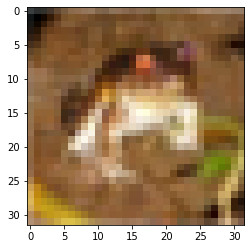

In [2]:
from IPython.display import Image
Image(filename="frog.png", width=300, height=300)

The transformation, using only 4 colors / centroids would look like:

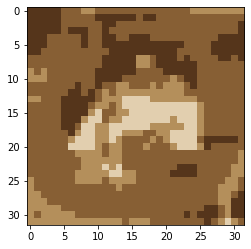

In [3]:
Image(filename="frog_4.png", width=300, height=300)

label selected b'beach_wagon_s_000749.png' and ran is 4492


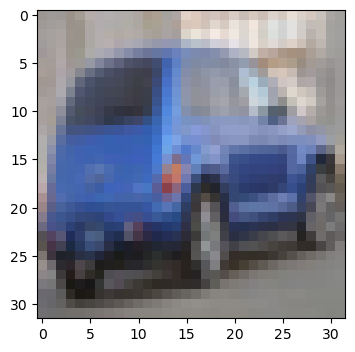

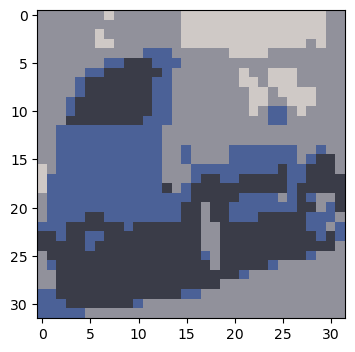

In [8]:
def clusterOneColor(cNum,ran):
    if(ran<0):
        ran = rd.randint(0,8196)
    whole = unpickle(file)
    selected = whole.get(b'data')[ran]
    color = selected
    rgb= np.empty((0))
    for i in range(1024):
        three = [color[i],color[i+1024],color[i+2048]]
        rgb = np.append(rgb,three)
        
    rgb = rgb.reshape(-1,3)
    print(f"label selected {label[ran]} and ran is {ran}")
    
    kmeans = KMeans(n_clusters=cNum, random_state=0, n_init=cNum)
    kmeans.fit(rgb)
    cen = kmeans.cluster_centers_
    lab = kmeans.labels_
    clustered = np.empty([32,32,3],dtype = 'int16')
    
    k = 0
    for x in range(32):
        for y in range(32):
            clustered[x][y][0] = np.round(cen[lab[k]][0])
            clustered[x][y][1] = cen[lab[k]][1]
            clustered[x][y][2] = cen[lab[k]][2]
            k = k+1
    
    selected = color.reshape(3,32,32)
    for i in range(3):
        selected[i] = selected[i].T

    plt.figure(figsize=(4, 4))
    selected = selected.swapaxes(2,0)
    plt.imshow(selected)
    plt.show()

    plt.figure(figsize=(4, 4))
    plt.imshow(clustered)
    plt.show()   
    return ran



ran  = clusterOneColor(4,-1)

e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

label selected b'beach_wagon_s_000749.png' and ran is 4492


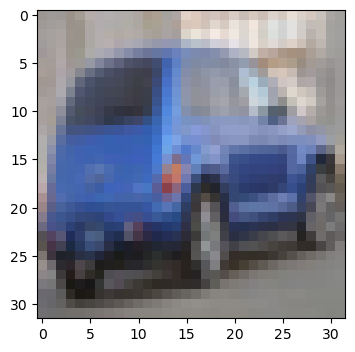

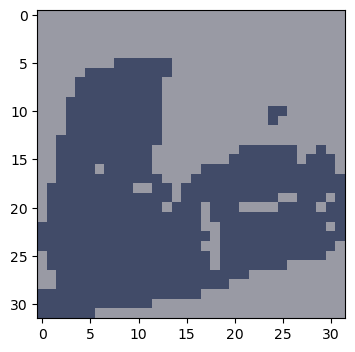

label selected b'beach_wagon_s_000749.png' and ran is 4492


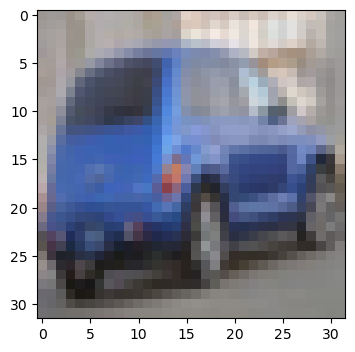

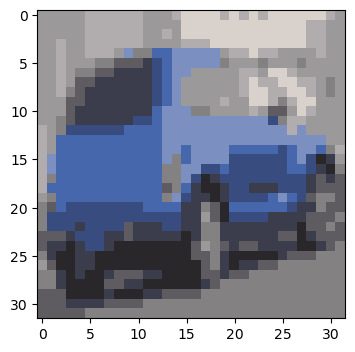

4492

In [9]:
clusterOneColor(2,ran)
clusterOneColor(10,ran)